**Tutotrial 1**

In this tutorial, we shall use famous Python packages to do basic data analysis. This includes Pandas, Sklearn and Pandas profiling package.

Run the following code to start installing Python packages.

In [ ]:
import sys

!pip install ydata-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6b060356ce9bc88419943444c108f83a44c8710a1fd1580681140bea1c8918bb
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	


Upload your data set file to Google Drive. I am uploading german_credit.arff file. We can also uplaod the CSV file but with the CSV file, we shall have to define categorical and numeric data types correctly. In the case of arff files, I have already defined the correct data types. This means you just need to run the following code snippet to load correct data types for the three dataset in this project..

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [ ]:
import pandas as pd
from scipy.io import arff
import numpy as np

# data_file = "german_credit.arff"
# If using other datasets then comment the above line and uncomment one of the following two lines
data_file = "/content/bank.csv"
# data_file = "churn.arff"

# Using pd.read_csv to load the CSV file
df = pd.read_csv(data_file)

# Iterate through columns and decode if necessary
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column has object dtype
        # Check if any element in the column is of type bytes
        if any(isinstance(x, bytes) for x in df[col]):
            df[col] = df[col].str.decode('utf-8')  # Decode only if necessary

# Look at loaded data and data types
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [ ]:
# Let's display first 10 records
df.head(10)


age            job  marital  education default  balance housing loan  \
0   30     unemployed  married    primary      no     1787      no   no   
1   33       services  married  secondary      no     4789     yes  yes   
2   35     management   single   tertiary      no     1350     yes   no   
3   30     management  married   tertiary      no     1476     yes  yes   
4   59    blue-collar  married  secondary      no        0     yes   no   
5   35     management   single   tertiary      no      747      no   no   
6   36  self-employed  married   tertiary      no      307     yes   no   
7   39     technician  married  secondary      no      147     yes   no   
8   41   entrepreneur  married   tertiary      no      221     yes   no   
9   43       services  married    primary      no      -88     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
5  cellular   23   feb       141         2    176         3  failure  no  
6  cellular   14   may       341         1    330         2    other  no  
7  cellular    6   may       151         2     -1         0  unknown  no  
8   unknown   14   may        57         2     -1         0  unknown  no  
9  cellular   17   apr       313         1    147         2  failure  no

In [ ]:
# look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

# **BaseLine Testing on all attributes:**
Previously (Section 2: Categorical to One-Hot (numeric) Encoding)
# This section works with all datasets
Now, let's try to create on-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features. More here: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

# **using train test split here.**

In [ ]:
df = pd.read_csv('bank.csv')
cat_cols=["job","marital","education","default", "housing","loan","contact","month","poutcome"]

In [ ]:
# Create a copy of the data frame in memory with a different name
df_onehot_baseline=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot_baseline= pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot_baseline

age  balance  day  duration  campaign  pdays  previous   y  job_admin.  \
0      30     1787   19        79         1     -1         0  no       False   
1      33     4789   11       220         1    339         4  no       False   
2      35     1350   16       185         1    330         1  no       False   
3      30     1476    3       199         4     -1         0  no       False   
4      59        0    5       226         1     -1         0  no       False   
...   ...      ...  ...       ...       ...    ...       ...  ..         ...   
4516   33     -333   30       329         5     -1         0  no       False   
4517   57    -3313    9       153         1     -1         0  no       False   
4518   57      295   19       151        11     -1         0  no       False   
4519   28     1137    6       129         4    211         3  no       False   
4520   44     1136    3       345         2    249         7  no       False   

      job_blue-collar  ...  month_jun  month_mar  month_may  month_nov  \
0               False  ...      False      False      False      False   
1               False  ...      False      False       True      False   
2               False  ...      False      False      False      False   
3               False  ...       True      False      False      False   
4                True  ...      False      False       True      False   
...               ...  ...        ...        ...        ...        ...   
4516            False  ...      False      False      False      False   
4517            False  ...      False      False       True      False   
4518            False  ...      False      False      False      False   
4519             True  ...      False      False      False      False   
4520            False  ...      False      False      False      False   

      month_oct  month_sep  poutcome_failure  poutcome_other  \
0          True      False             False           False   
1         False      False              True           False   
2         False      False              True           False   
3         False      False             False           False   
4         False      False             False           False   
...         ...        ...               ...             ...   
4516      False      False             False           False   
4517      False      False             False           False   
4518      False      False             False           False   
4519      False      False             False            True   
4520      False      False             False            True   

      poutcome_success  poutcome_unknown  
0                False              True  
1                False             False  
2                False             False  
3                False              True  
4                False              True  
...                ...               ...  
4516             False              True  
4517             False              True  
4518             False              True  
4519             False             False  
4520             False             False  

[4521 rows x 52 columns]

In [ ]:
####
##For Bank data set only
####
# in the case of bank data set, pdays and balance columns have negative values. Those columns won't work with Naive Bayes. So run the following
# line of code for bank data set to make negative values to 0. Note that it is not necessary for decision tree to remove negative values.
df_onehot_baseline["pdays"]=df_onehot_baseline["pdays"].apply(lambda x: 0 if x<0 else x)
df_onehot_baseline["balance"]=df_onehot_baseline["balance"].apply(lambda x: 0 if x<0 else x)


In [ ]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
#class_col_name="Creditability"
# Uncomment following line for class name for bank dataset
class_col_name="y"
# Uncomment following line for class name for Churn dataset
#class_col_name="Churn"
one_hot_feature_names=df_onehot_baseline.columns[df_onehot_baseline.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot_baseline.loc[:, one_hot_feature_names], df_onehot_baseline[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


Let's look at Naive Bayes output

In [ ]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  51
Classes  ['no' 'yes']
Number of records for classes  [2812.  352.]
Log prior probability for classes  [-0.11794108 -2.19596115]
Log conditional probability for each feature given a class
 [[ -3.77699969  -0.20579945  -4.7182279   -2.06172295  -6.45024974
   -3.9085675   -8.26762713  -9.73706738  -9.01080459 -10.71230065
  -11.21129181  -9.0557747  -10.57876926 -10.68586739  -9.83608814
  -11.6931299   -9.228264   -11.10006618 -12.33975707  -9.65624797
   -7.95773043  -8.83365382  -9.36469143  -8.14597861  -8.72638516
  -10.72126932  -7.50528054 -11.58065192  -8.38154468  -8.01502254
   -7.66820347  -9.29307247  -7.97550103 -10.22131337  -8.62507697
  -10.27174422  -9.48537891 -13.23357494 -10.60248578 -10.87692263
   -9.28876211  -9.63778591 -12.38627708  -8.60208745  -9.88953597
  -12.13496265 -12.48636054  -9.73706738 -10.71230065 -12.06350369
   -7.65678444]
 [ -4.01881151  -0.35254039  -5.00044473  -1.43329375  -6.90624091
   -3.55629465  -7.69253715  -9

We have probailities of a lot more features now.

See evaluation metrics below.

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[516 672]
 [ 46 123]]
TP:  123 , FP:  672 , TN:  516 , FN: 46


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

          no       0.92      0.43      0.59      1188
         yes       0.15      0.73      0.26       169

    accuracy                           0.47      1357
   macro avg       0.54      0.58      0.42      1357
weighted avg       0.82      0.47      0.55      1357



**Let's run decision tree on one-hot encoded data**

class Names ['no' 'yes']


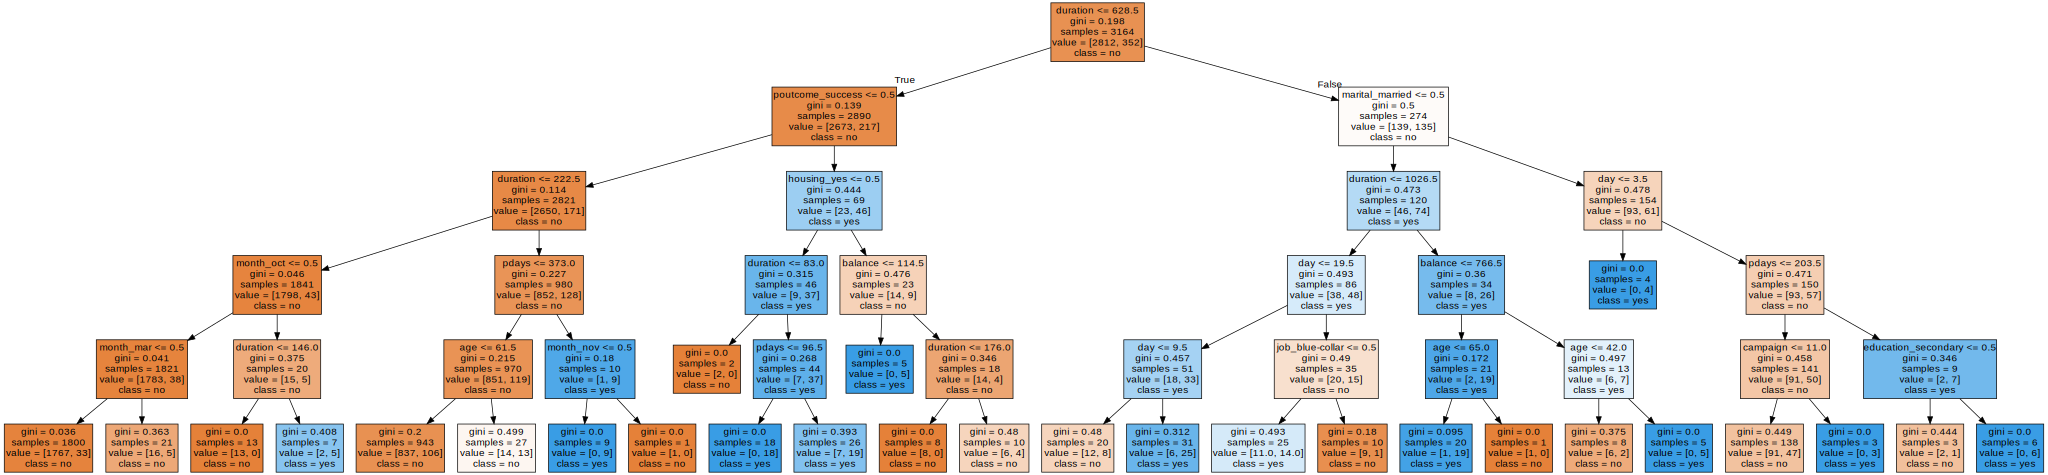

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot_baseline[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=one_hot_feature_names,
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph


In [ ]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.91      0.97      0.94      1188
         yes       0.59      0.29      0.39       169

    accuracy                           0.89      1357
   macro avg       0.75      0.63      0.66      1357
weighted avg       0.87      0.89      0.87      1357



## **using ten- fold cross-validation**

---



In [ ]:
df = pd.read_csv('bank.csv')
cat_cols=["job","marital","education","default", "housing","loan","contact","month","poutcome"]

In [ ]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot

age  balance  day  duration  campaign  pdays  previous   y  job_admin.  \
0      30     1787   19        79         1     -1         0  no       False   
1      33     4789   11       220         1    339         4  no       False   
2      35     1350   16       185         1    330         1  no       False   
3      30     1476    3       199         4     -1         0  no       False   
4      59        0    5       226         1     -1         0  no       False   
...   ...      ...  ...       ...       ...    ...       ...  ..         ...   
4516   33     -333   30       329         5     -1         0  no       False   
4517   57    -3313    9       153         1     -1         0  no       False   
4518   57      295   19       151        11     -1         0  no       False   
4519   28     1137    6       129         4    211         3  no       False   
4520   44     1136    3       345         2    249         7  no       False   

      job_blue-collar  ...  month_jun  month_mar  month_may  month_nov  \
0               False  ...      False      False      False      False   
1               False  ...      False      False       True      False   
2               False  ...      False      False      False      False   
3               False  ...       True      False      False      False   
4                True  ...      False      False       True      False   
...               ...  ...        ...        ...        ...        ...   
4516            False  ...      False      False      False      False   
4517            False  ...      False      False       True      False   
4518            False  ...      False      False      False      False   
4519             True  ...      False      False      False      False   
4520            False  ...      False      False      False      False   

      month_oct  month_sep  poutcome_failure  poutcome_other  \
0          True      False             False           False   
1         False      False              True           False   
2         False      False              True           False   
3         False      False             False           False   
4         False      False             False           False   
...         ...        ...               ...             ...   
4516      False      False             False           False   
4517      False      False             False           False   
4518      False      False             False           False   
4519      False      False             False            True   
4520      False      False             False            True   

      poutcome_success  poutcome_unknown  
0                False              True  
1                False             False  
2                False             False  
3                False              True  
4                False              True  
...                ...               ...  
4516             False              True  
4517             False              True  
4518             False              True  
4519             False             False  
4520             False             False  

[4521 rows x 52 columns]

In [ ]:
df_onehot["pdays"]=df_onehot["pdays"].apply(lambda x: 0 if x<0 else x)
df_onehot["balance"]=df_onehot["balance"].apply(lambda x: 0 if x<0 else x)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = df_onehot.drop('y', axis=1)
y = df_onehot['y']

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize Multinomial Naive Bayes classifier
nb_model = MultinomialNB()

# Set up 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

all_y_true = []
all_y_pred = []

# Perform 10-fold cross-validation
for train_index, test_index in cv.split(X, y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Train the model
    nb_model.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = nb_model.predict(X_test)

    # Store true and predicted labels
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

print("Successfully done..")

Successfully done..


In [ ]:
print("Number of features used:", nb_model.n_features_in_)
print("Classes:", nb_model.classes_)
print("Number of records for classes:", nb_model.class_count_)
print("Log prior probability for classes:", nb_model.class_log_prior_)
print("Log conditional probability for each feature given a class:\n", nb_model.feature_log_prob_)

Number of features used: 51
Classes: [0 1]
Number of records for classes: [3600.  469.]
Log prior probability for classes: [-0.12246342 -2.16054978]
Log conditional probability for each feature given a class:
 [[ -3.77758877  -0.20611138  -4.72219346  -2.06193186  -6.44817086
   -3.89169568  -8.25748675  -9.7567994   -9.0140984  -10.73941277
  -11.1484557   -9.05433745 -10.60588138 -10.67710889  -9.82026897
  -11.62061219  -9.26759624 -10.99892397 -12.34885069  -9.66978802
   -7.95705054  -8.84265     -9.3602869   -8.15703378  -8.73024043
  -10.65717468  -7.50945572 -11.53792047  -8.37586698  -8.02471803
   -7.6617714   -9.34777557  -7.97714499 -10.22146968  -8.63266879
  -10.31976303  -9.49279107 -13.28315992 -10.59345886 -10.87703415
   -9.31802709  -9.60801066 -12.31375937  -8.60778548  -9.91586409
  -11.99217574 -12.12570714  -9.74088394 -10.74658126 -11.99217574
   -7.65979902]
 [ -3.99119645  -0.35805552  -4.99265902  -1.4286744   -6.92044755
   -3.48578979  -7.64821357  -9.89559

In [ ]:
# Confusion Matrix
cf = confusion_matrix(all_y_true, all_y_pred)
print("Confusion Matrix:")
print(cf)
tn, fp, fn, tp = cf.ravel()
print("TP:", tp, ", FP:", fp, ", TN:", tn, ", FN:", fn)



Confusion Matrix:
[[1725 2275]
 [ 151  370]]
TP: 370 , FP: 2275 , TN: 1725 , FN: 151


In [ ]:
print("\nClassification Report:")
print(classification_report(all_y_true, all_y_pred, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.43      0.59      4000
         yes       0.14      0.71      0.23       521

    accuracy                           0.46      4521
   macro avg       0.53      0.57      0.41      4521
weighted avg       0.83      0.46      0.55      4521



In [ ]:
# prompt: write a code that will develop a decision tree using ten-fold cross validation

# Initialize Decision Tree classifier
dt_model = tree.DecisionTreeClassifier(max_depth=5)

# Set up 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

all_y_true = []
all_y_pred = []

# Perform 10-fold cross-validation
for train_index, test_index in cv.split(X, y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Train the model
    dt_model.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = dt_model.predict(X_test)

    # Store true and predicted labels
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

print("Successfully done..")

# Confusion Matrix
cf = confusion_matrix(all_y_true, all_y_pred)
print("Confusion Matrix:")
print(cf)
tn, fp, fn, tp = cf.ravel()
print("TP:", tp, ", FP:", fp, ", TN:", tn, ", FN:", fn)


print("\nClassification Report:")
print(classification_report(all_y_true, all_y_pred, target_names=label_encoder.classes_))


Successfully done..
Confusion Matrix:
[[3881  119]
 [ 356  165]]
TP: 165 , FP: 119 , TN: 3881 , FN: 356

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      4000
         yes       0.58      0.32      0.41       521

    accuracy                           0.89      4521
   macro avg       0.75      0.64      0.68      4521
weighted avg       0.88      0.89      0.88      4521



class Names ['no' 'yes']


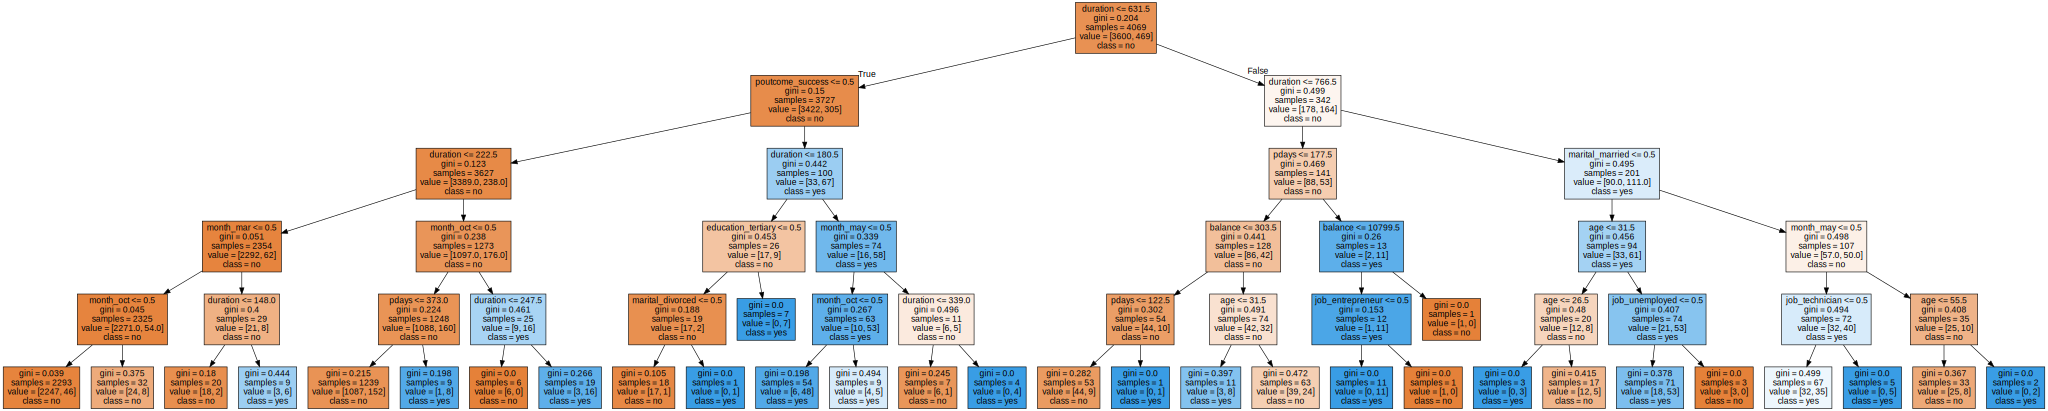

In [ ]:
#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(dt_model, out_file=None,
                                feature_names=one_hot_feature_names,
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

**Appendix**

**Exploratory Analysis**

We have learnt how to implement classification algorithms in Python but we have just done basic exploratory data analysis in the beginning using info function, describe function,and  head function of Pandas. Here is a very good Python pacakge that performs varirty of the basic analysis by itself and generates a report for you. You can analyze mising values, dupicate values, correlation, etc.


In [ ]:
from ydata_profiling import ProfileReport

# Generate the data profiling report
report = ProfileReport(df)

In [ ]:
#Display report
report
#To save to HTML file
#report.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 17/17 [00:00<00:00, 50.71it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

After you have performed exploratory analysis and determined the features or rows you would like to remove (if any) then you can use simple pandas statements to select a subset of data frame. Here is the documentation: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html. For example, if you want to drop a column name "Phone Number" then you can use:

df=df.drop(columns=['Phone Number'])

Learning Pandas will be useful for you in the long run as it is used everywhere in data science world. After doing any feature selection (or fitering of rows) you can run the above decision tree and Naive Bayes models again for comparison with original data.



```
For CIND 119 course at Ryerson
  by Syed Shariyar Murtaza,Ph.D.
```



In [ ]:
#df=df.drop(columns=['Phone Number'])
#df.to_csv("somename.csv")


# **Analysis- Looking for Correlation**

**Heat Map**

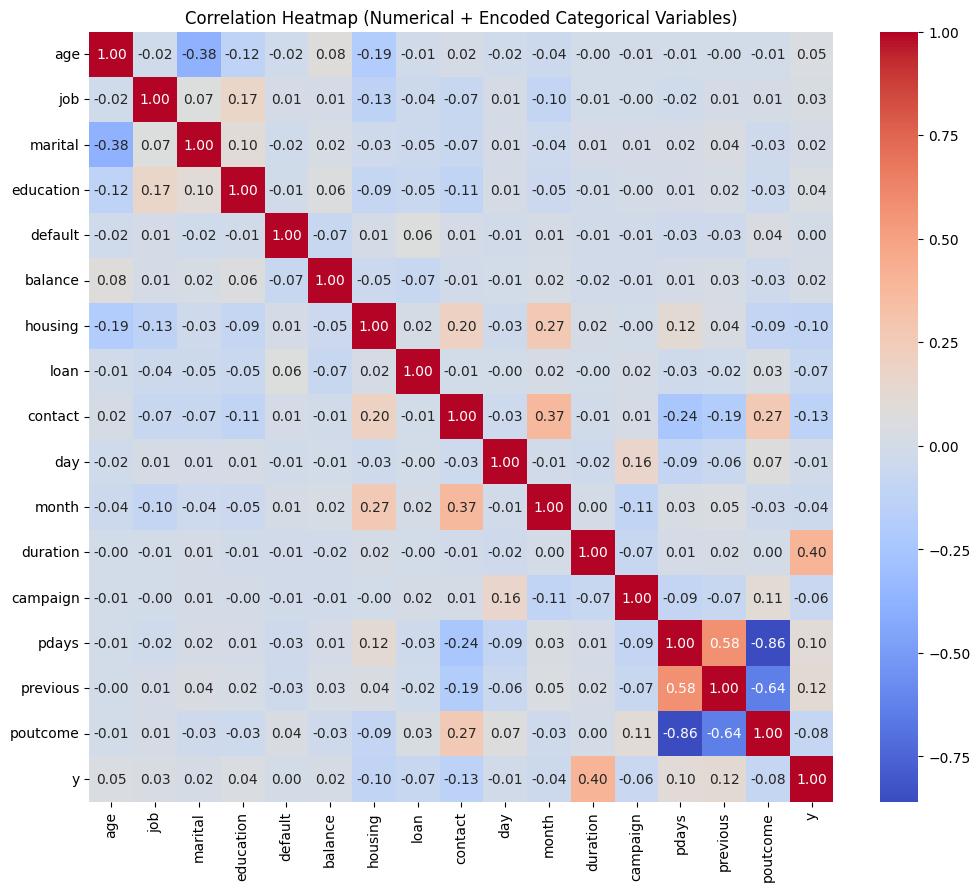

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv(data_file)

# Make a copy to avoid modifying original
df_encoded = df.copy()

# Encode categorical variables
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Now we have both numeric and encoded categorical variables
# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical + Encoded Categorical Variables)')
plt.show()


**Chi-Square Test for All Categorical Variables vs y **

In [ ]:
from scipy.stats import chi2_contingency
# Load data
df = pd.read_csv('bank.csv')

# Replace 'unknown' with NaN and drop rows with missing values
df.replace('unknown', pd.NA, inplace=True)
df.dropna(inplace=True)

# Identify categorical columns (excluding the target)
categorical_columns = df.select_dtypes(include='object').columns.drop('y')

# Dictionary to store p-values
p_values = {}

# Perform chi-square test for each categorical variable against 'y'
for col in categorical_columns:
    contingency = pd.crosstab(df[col], df['y'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    p_values[col] = p

# Convert to DataFrame and sort by p-value
pval_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p_value'])
pval_df.sort_values(by='p_value', inplace=True)

# Display the ranked results
print("Chi-Square Test P-Values (Categorical vs y):")
print(pval_df)

Chi-Square Test P-Values (Categorical vs y):
                p_value
poutcome   2.256202e-32
month      1.822078e-15
housing    2.359625e-11
job        3.001923e-02
loan       3.091999e-02
education  4.675696e-02
marital    5.027347e-01
default    1.000000e+00
contact    1.000000e+00


In [ ]:
df = pd.read_csv('bank.csv')
df.isin(['unknown']).sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

# **1. Drop and transform low-informative features:**
- Dropping Default
- Binning Pday (-1 is Never contacted, else contacted)



In [ ]:
# prompt: write a code that counts the categories in default and poutcome columns with the percentage

# Load the dataset
df = pd.read_csv('bank.csv')

# Calculate category counts and percentages for 'default'
default_counts = df['default'].value_counts()
default_percentages = df['default'].value_counts(normalize=True) * 100

print("Default Column:")
print(default_counts)
print(default_percentages)


# Calculate category counts and percentages for 'poutcome'
poutcome_counts = df['poutcome'].value_counts()
poutcome_percentages = df['poutcome'].value_counts(normalize=True) * 100

print("\nPoutcome Column:")
print(poutcome_counts)
print(poutcome_percentages)

# Calculate category counts and percentages for 'contact'
contact_counts = df['contact'].value_counts()
contact_percentages = df['contact'].value_counts(normalize=True) * 100

print("\ncontact Column:")
print(contact_counts)
print(contact_percentages)


Default Column:
default
no     4445
yes      76
Name: count, dtype: int64
default
no     98.318956
yes     1.681044
Name: proportion, dtype: float64

Poutcome Column:
poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64
poutcome
unknown    81.950896
failure    10.838310
other       4.357443
success     2.853351
Name: proportion, dtype: float64

contact Column:
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64
contact
cellular     64.056625
unknown      29.285556
telephone     6.657819
Name: proportion, dtype: float64


In [ ]:
# Transforming 'pdays' into a categorical column
df['pdays_status'] = df['pdays'].apply(lambda x: 'never_contacted' if x == -1 else 'contacted')

# Previewing the new column
print(df[['pdays', 'pdays_status']].head())

   pdays     pdays_status
0     -1  never_contacted
1    339        contacted
2    330        contacted
3     -1  never_contacted
4     -1  never_contacted


In [ ]:
#We are dropping insignificant columns
df.drop(columns=['default', 'contact','pdays'], inplace=True)
# Optional: Check the updated structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           4521 non-null   int64 
 1   job           4521 non-null   object
 2   marital       4521 non-null   object
 3   education     4521 non-null   object
 4   balance       4521 non-null   int64 
 5   housing       4521 non-null   object
 6   loan          4521 non-null   object
 7   day           4521 non-null   int64 
 8   month         4521 non-null   object
 9   duration      4521 non-null   int64 
 10  campaign      4521 non-null   int64 
 11  previous      4521 non-null   int64 
 12  poutcome      4521 non-null   object
 13  y             4521 non-null   object
 14  pdays_status  4521 non-null   object
dtypes: int64(6), object(9)
memory usage: 529.9+ KB
None


# **2. Calculating Mean, Median, Standard Deviation**

In [ ]:
# prompt: Find the min,max,mean and standard deviation of the attributes

# Assuming 'df' is your pandas DataFrame (as defined in the previous code)

# Calculate min, max, mean, and standard deviation for each numeric attribute
numeric_attributes = df.select_dtypes(include=np.number)

for attribute in numeric_attributes.columns:
    min_val = numeric_attributes[attribute].min()
    max_val = numeric_attributes[attribute].max()
    mean_val = numeric_attributes[attribute].mean()
    std_val = numeric_attributes[attribute].std()
    print(f"Attribute: {attribute}")
    print(f"  Min: {min_val}")
    print(f"  Max: {max_val}")
    print(f"  Mean: {mean_val}")
    print(f"  Standard Deviation: {std_val}")


Attribute: age
  Min: 19
  Max: 87
  Mean: 41.17009511170095
  Standard Deviation: 10.576210958711275
Attribute: balance
  Min: -3313
  Max: 71188
  Mean: 1422.6578190665782
  Standard Deviation: 3009.6381424673496
Attribute: day
  Min: 1
  Max: 31
  Mean: 15.915284229152842
  Standard Deviation: 8.247667327229966
Attribute: duration
  Min: 4
  Max: 3025
  Mean: 263.96129174961294
  Standard Deviation: 259.85663262468245
Attribute: campaign
  Min: 1
  Max: 50
  Mean: 2.793629727936297
  Standard Deviation: 3.1098066601886134
Attribute: previous
  Min: 0
  Max: 25
  Mean: 0.5425790754257908
  Standard Deviation: 1.6935623506071464


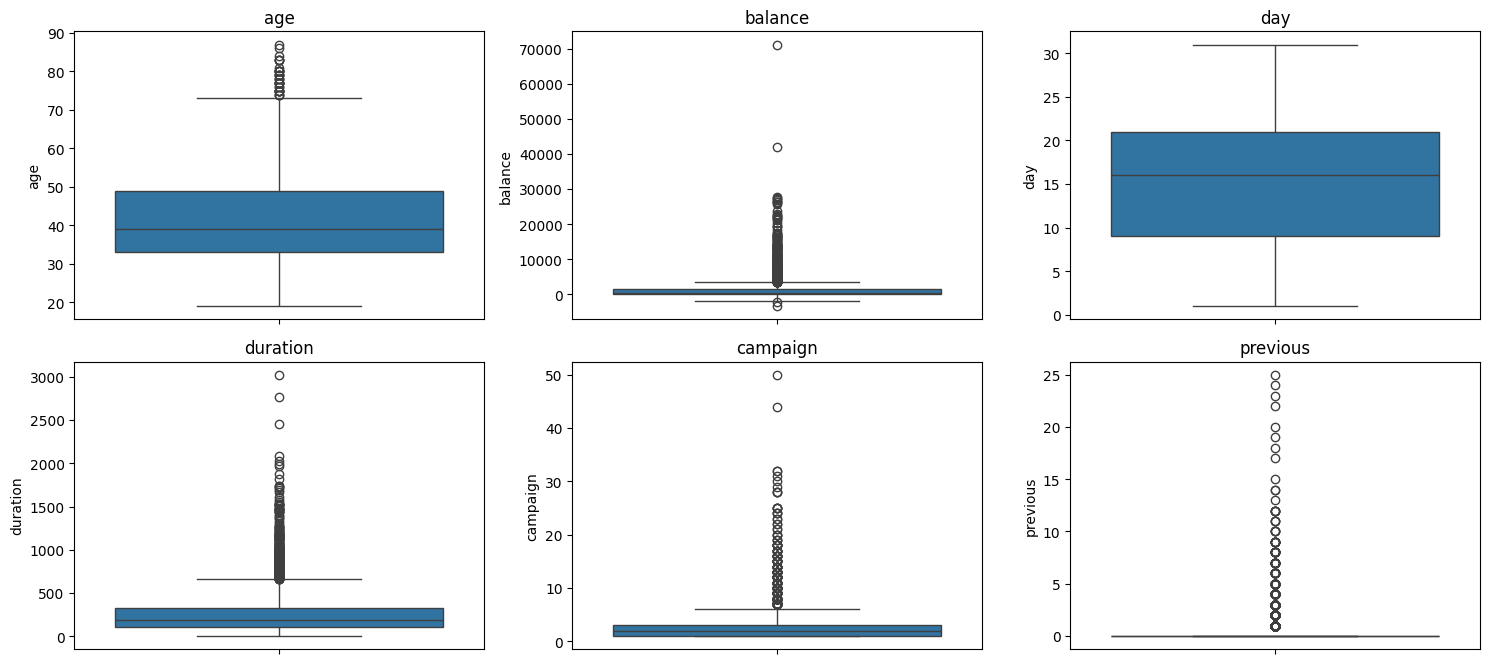

In [ ]:
# prompt: Create multiple box plots for the numerical attributes

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your pandas DataFrame and 'numeric_attributes' is defined as in the previous code

# Create multiple box plots for numerical attributes
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
for i, attribute in enumerate(numeric_attributes.columns):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=numeric_attributes[attribute])
    plt.title(attribute)
plt.tight_layout()
plt.show()


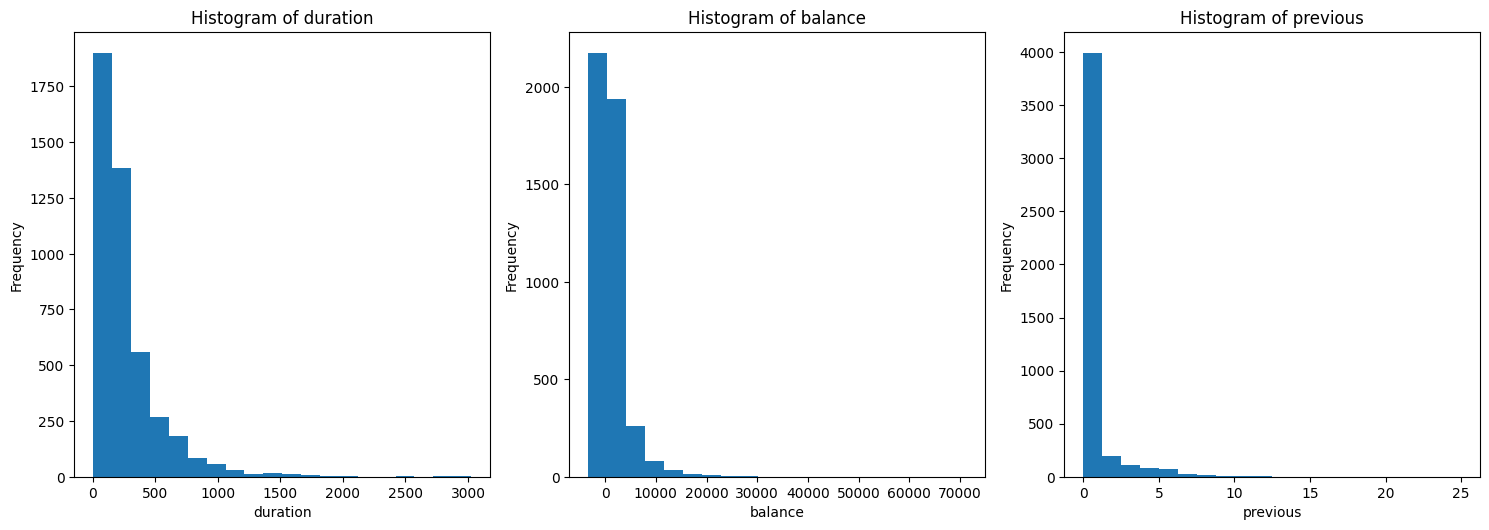

In [ ]:
#Plot a histogram for campaign, duration, balance

# Assuming 'df' is your pandas DataFrame (as defined in the previous code)
# Select the specified columns for the histogram
columns_to_plot = ['duration', 'balance','previous']
numeric_df = df[columns_to_plot].select_dtypes(include=np.number)

# Create a figure and axes
plt.figure(figsize=(15, 10))

# Create histograms for each specified column
for i, col in enumerate(numeric_df.columns):
    plt.subplot(2, 3, i+1)  # Adjust subplot grid as needed
    plt.hist(numeric_df[col], bins=20) # Adjust the number of bins
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# **3. Normalize**

In [ ]:
from sklearn.preprocessing import StandardScaler
# --- Step 1: Replace negative balance values ---
df['balance'] = df['balance'].apply(lambda x: max(x, 0))

# --- Step 2: Log-transform balance and duration ---
df['balance_log'] = np.log1p(df['balance'])     # log(1 + balance)
df['duration_log'] = np.log1p(df['duration'])   # log(1 + duration)


In [ ]:
df.drop(columns=['balance', 'duration'], inplace=True)

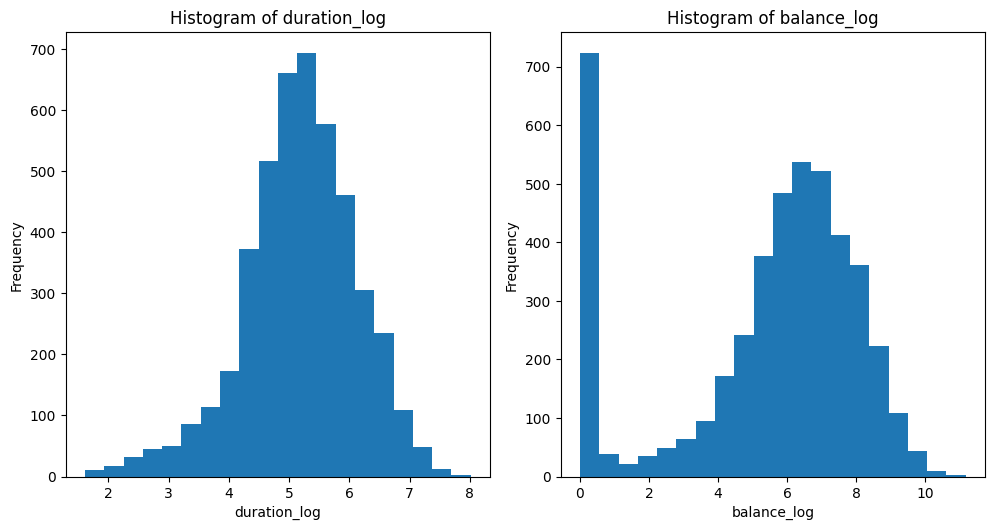

In [ ]:
columns_to_plot = ['duration_log', 'balance_log',]
numeric_df = df[columns_to_plot].select_dtypes(include=np.number)

# Create a figure and axes
plt.figure(figsize=(15, 10))

# Create histograms for each specified column
for i, col in enumerate(numeric_df.columns):
    plt.subplot(2, 3, i+1)  # Adjust subplot grid as needed
    plt.hist(numeric_df[col], bins=20) # Adjust the number of bins
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# **2. Encode Categorical Variables**

In [ ]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=[
    'job', 'marital', 'housing', 'loan', 'poutcome', 'month', 'pdays_status'
], drop_first=True)

In [ ]:
#Enconding ordinal values
from sklearn.preprocessing import OrdinalEncoder

# Defining the order for education
edu_order = [['unknown', 'primary', 'secondary', 'tertiary']]

# Applying ordinal encoding
ord_encoder = OrdinalEncoder(categories=edu_order)
education_encoded = ord_encoder.fit_transform(df[['education']])

# Added back into dataframe
df['education_encoded'] = education_encoded
df.drop(columns='education', inplace=True)

# **5. Define class balance**

y
no     4000
yes     521
Name: count, dtype: int64
y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64


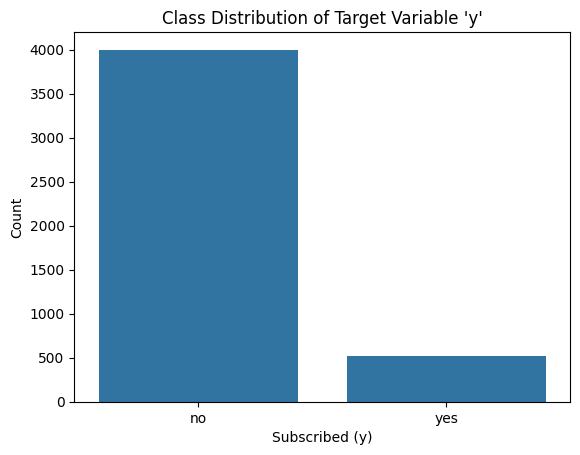

In [ ]:
#Handle Class Imbalance

print(df['y'].value_counts())
print(df['y'].value_counts(normalize=True))  # Shows proportions


sns.countplot(data=df, x='y')
plt.title("Class Distribution of Target Variable 'y'")
plt.xlabel("Subscribed (y)")
plt.ylabel("Count")
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           4521 non-null   float64
 1   day                           4521 non-null   float64
 2   campaign                      4521 non-null   float64
 3   previous                      4521 non-null   float64
 4   y                             4521 non-null   object 
 5   balance_log                   4521 non-null   float64
 6   duration_log                  4521 non-null   float64
 7   job_blue-collar               4521 non-null   bool   
 8   job_entrepreneur              4521 non-null   bool   
 9   job_housemaid                 4521 non-null   bool   
 10  job_management                4521 non-null   bool   
 11  job_retired                   4521 non-null   bool   
 12  job_self-employed             4521 non-null   bool   
 13  job

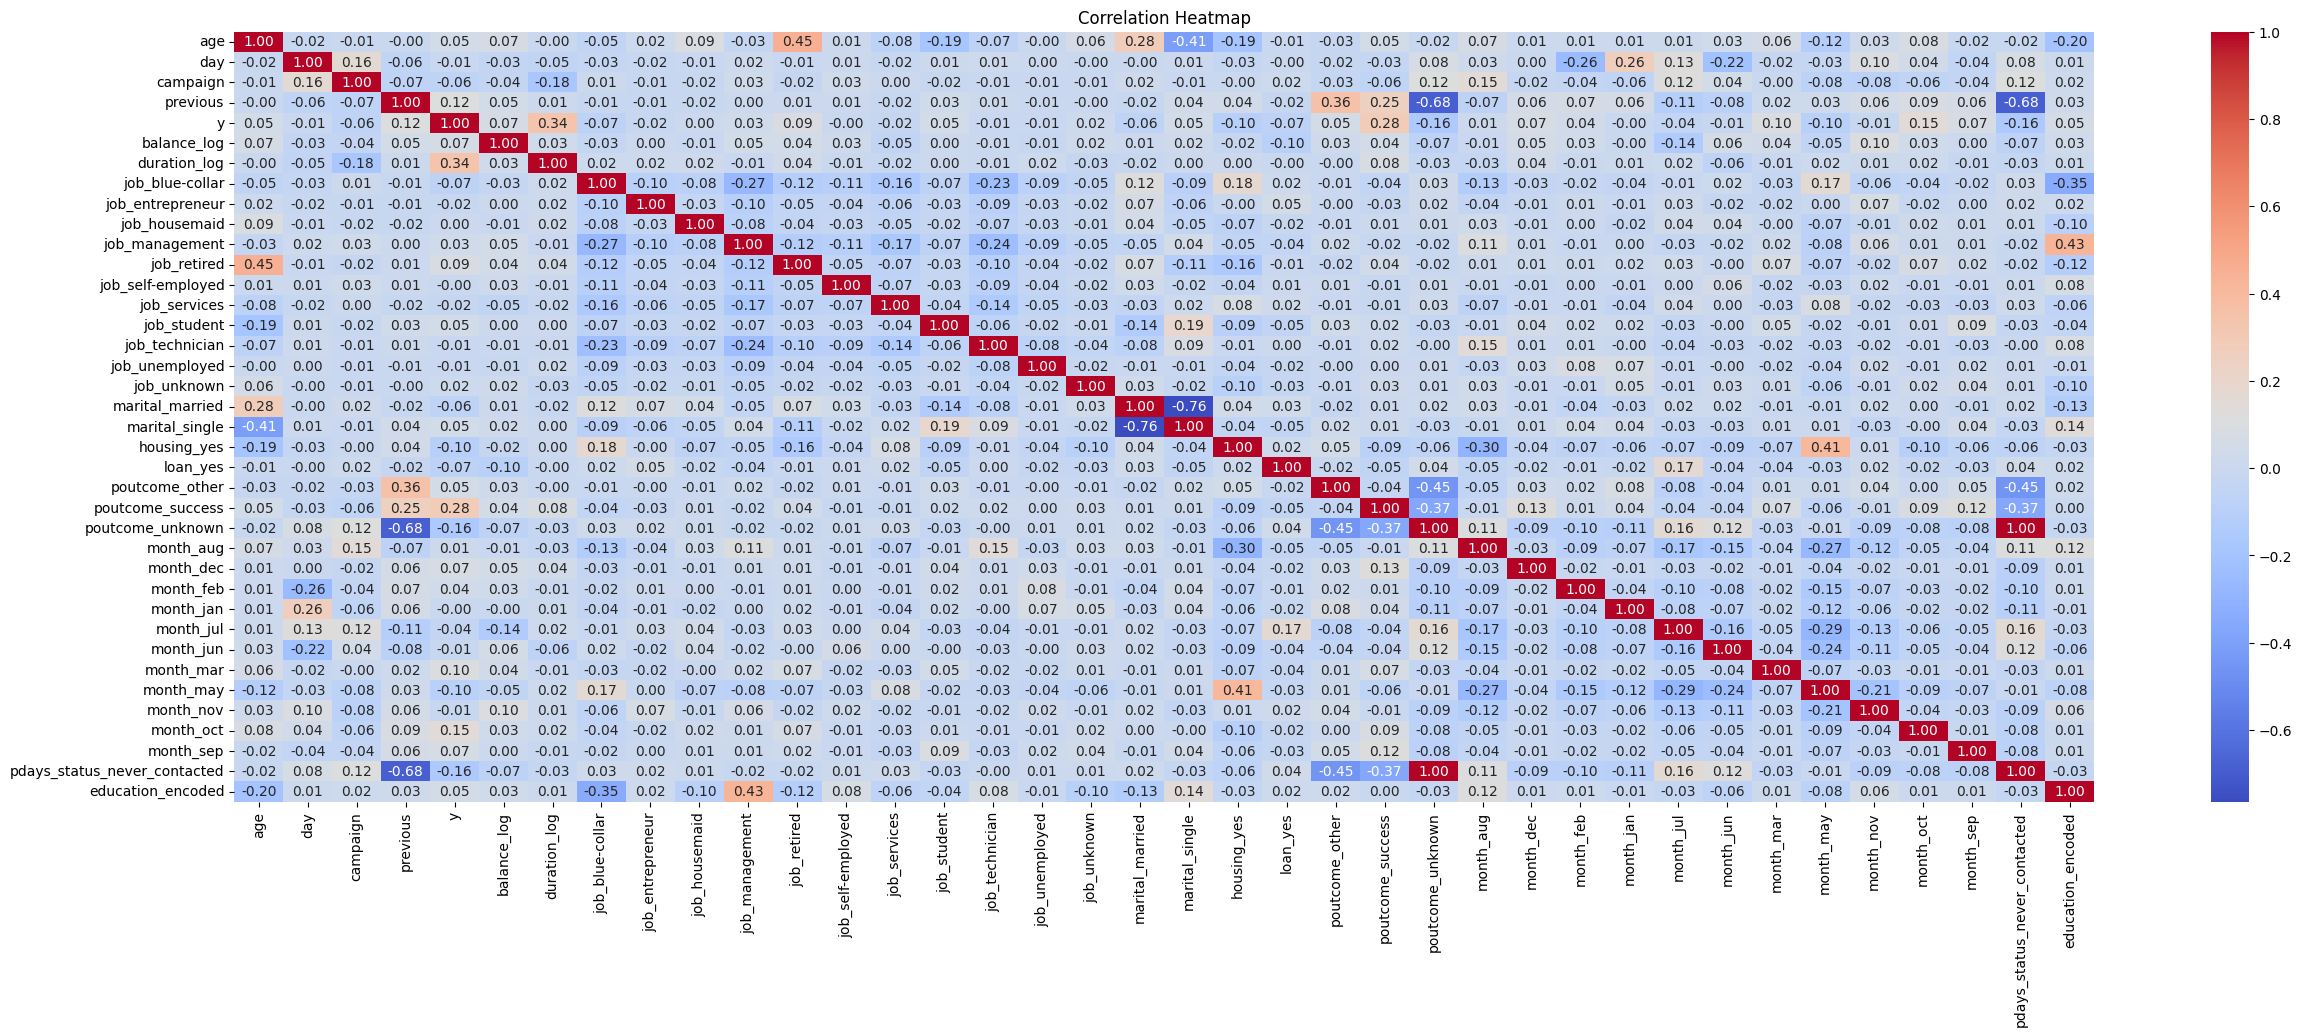

In [ ]:
# prompt: create a heat map and encode y

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and has already been preprocessed
# as shown in the provided code.  This includes one-hot encoding and
# other transformations.

# Encoding the target variable 'y' before calculating correlation
label_encoder_y = LabelEncoder()
df['y'] = label_encoder_y.fit_transform(df['y']) # Encode 'y' to numerical values

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Running the Naives bayes and decision tree again

In [ ]:
df_onehot_selected=df.copy()
df_onehot_selected

age  day  campaign  previous   y  balance_log  duration_log  \
0      30   19         1         0  no     7.488853      4.382027   
1      33   11         1         4  no     8.474286      5.398163   
2      35   16         1         1  no     7.208600      5.225747   
3      30    3         4         0  no     7.297768      5.298317   
4      59    5         1         0  no     0.000000      5.424950   
...   ...  ...       ...       ...  ..          ...           ...   
4516   33   30         5         0  no     0.000000      5.799093   
4517   57    9         1         0  no     0.000000      5.036953   
4518   57   19        11         0  no     5.690359      5.023881   
4519   28    6         4         3  no     7.037028      4.867534   
4520   44    3         2         7  no     7.036148      5.846439   

      job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jan  \
0               False             False          False  ...      False   
1               False             False          False  ...      False   
2               False             False          False  ...      False   
3               False             False          False  ...      False   
4                True             False          False  ...      False   
...               ...               ...            ...  ...        ...   
4516            False             False          False  ...      False   
4517            False             False          False  ...      False   
4518            False             False          False  ...      False   
4519             True             False          False  ...      False   
4520            False              True          False  ...      False   

      month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0         False      False      False      False      False       True   
1         False      False      False       True      False      False   
2         False      False      False      False      False      False   
3         False       True      False      False      False      False   
4         False      False      False       True      False      False   
...         ...        ...        ...        ...        ...        ...   
4516       True      False      False      False      False      False   
4517      False      False      False       True      False      False   
4518      False      False      False      False      False      False   
4519      False      False      False      False      False      False   
4520      False      False      False      False      False      False   

      month_sep  pdays_status_never_contacted  education_encoded  
0         False                          True                1.0  
1         False                         False                2.0  
2         False                         False                3.0  
3         False                          True                3.0  
4         False                          True                2.0  
...         ...                           ...                ...  
4516      False                          True                2.0  
4517      False                          True                3.0  
4518      False                          True                2.0  
4519      False                         False                2.0  
4520      False                         False                3.0  

[4521 rows x 38 columns]

In [ ]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
#class_col_name="Creditability"
# Uncomment following line for class name for bank dataset
class_col_name="y"
one_hot_feature_names=df.columns[df_onehot_selected.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot_selected.loc[:, one_hot_feature_names], df_onehot_selected[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


In [ ]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  37
Classes  ['no' 'yes']
Number of records for classes  [2812.  352.]
Log prior probability for classes  [-0.11794108 -2.19596115]
Log conditional probability for each feature given a class
 [[ -0.64244726  -1.58367547  -3.31569731  -5.1330747   -2.69064501
   -2.73101186  -5.87625216  -7.57774822  -8.07673938  -5.92122227
   -7.44421682  -7.55131496  -6.70153571  -8.55857747  -6.09371157
   -7.96551375  -9.20520463  -4.823178    -5.69910139  -4.88047011
   -6.15852003  -7.57774822  -8.92895126  -4.52223201  -6.35082648
  -10.09902251  -7.46793335  -7.7423702   -6.15420968  -6.50323348
   -9.25172465  -5.46753502  -6.75498354  -9.00041022  -9.35180811
   -4.52223201  -3.63235952]
 [ -0.64311513  -1.62474834  -3.53054452  -4.31684076  -2.61950943
   -2.58231359  -6.24704378  -7.85648169  -7.95179187  -5.7545673
   -6.61679081  -7.76947032  -7.11888275  -7.54632676  -6.24704378
   -7.85648169  -8.4626175   -5.07259342  -5.47525347  -5.21742436
   -6.85317958  -6.

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[1092   96]
 [ 113   56]]
TP:  56 , FP:  96 , TN:  1092 , FN: 113


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.91      0.92      0.91      1188
         yes       0.37      0.33      0.35       169

    accuracy                           0.85      1357
   macro avg       0.64      0.63      0.63      1357
weighted avg       0.84      0.85      0.84      1357



class Names ['no' 'yes']


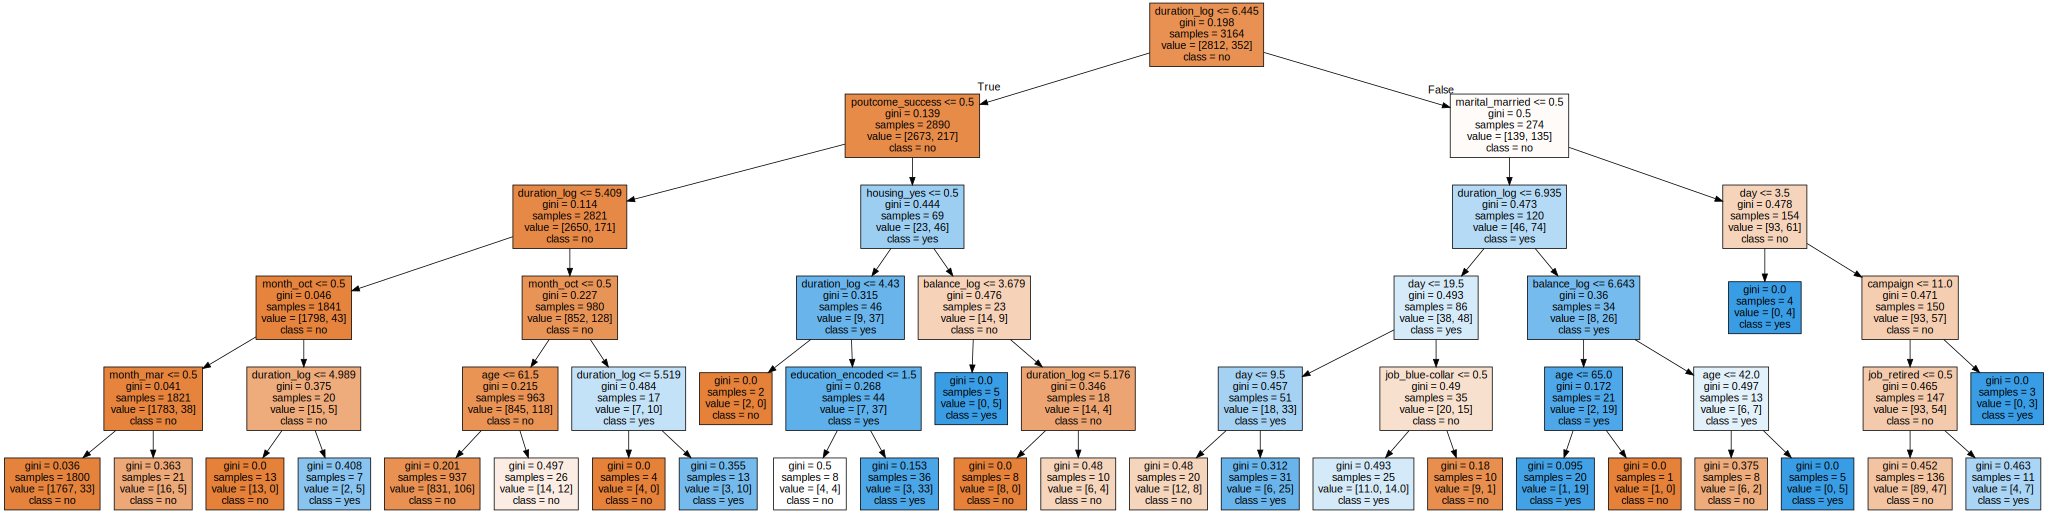

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot_selected[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=one_hot_feature_names,
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      1188
         yes       0.61      0.30      0.40       169

    accuracy                           0.89      1357
   macro avg       0.76      0.64      0.67      1357
weighted avg       0.87      0.89      0.87      1357



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('bank.csv')

# List of categorical columns
cat_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

# Handle missing/unknown values if needed (optional cleanup)
df["pdays"] = df["pdays"].apply(lambda x: 0 if x < 0 else x)
df["balance"] = df["balance"].apply(lambda x: 0 if x < 0 else x)

# One-hot encoding for categorical features
df_onehot = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Features and target
X = df_onehot.drop("y", axis=1)
y = df_onehot["y"].apply(lambda x: 1 if x == "yes" else 0)  # convert target to binary

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1168   37]
 [ 101   51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.58      0.34      0.42       152

    accuracy                           0.90      1357
   macro avg       0.75      0.65      0.68      1357
weighted avg       0.88      0.90      0.89      1357



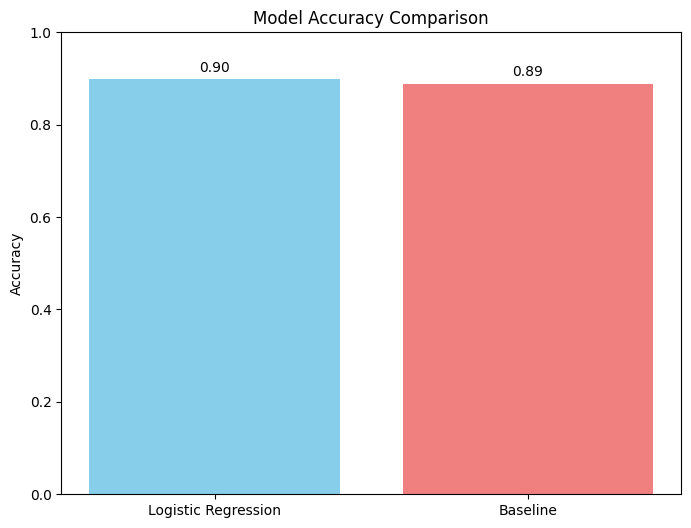

In [ ]:
# prompt: create a logistical regression and a baseline model and plot it

import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test, and logreg are already defined from the previous code

# Create a baseline model (DummyClassifier with 'most_frequent' strategy)
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

# Get accuracy of logistic regression model
logreg_accuracy = accuracy_score(y_test, y_pred)


# Plotting the comparison
models = ['Logistic Regression', 'Baseline']
accuracies = [logreg_accuracy, baseline_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom') # Display accuracy values on bars
plt.show()


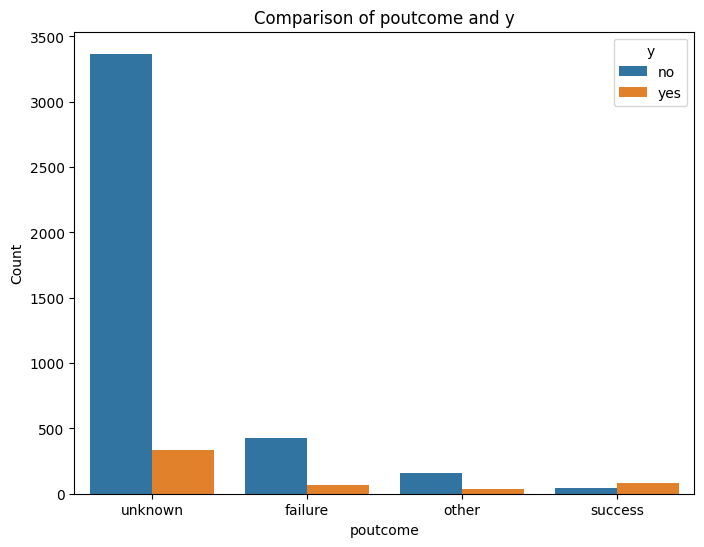

In [ ]:
# prompt: Generate a plot comparing poutcome and y

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame and contains the 'poutcome' and 'y' columns
# Load your dataset
df = pd.read_csv('bank.csv')

# Plotting poutcome vs. y
plt.figure(figsize=(8, 6))
sns.countplot(x='poutcome', hue='y', data=df)
plt.title('Comparison of poutcome and y')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.show()


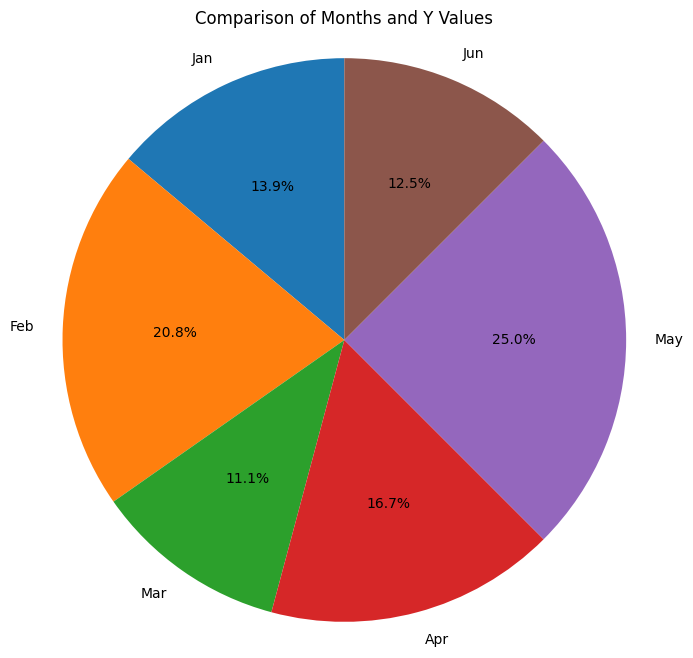

In [ ]:
# prompt: create a pie chart comparing months to y

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
y_values = [10, 15, 8, 12, 18, 9]

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(y_values, labels=months, autopct='%1.1f%%', startangle=90)
plt.title('Comparison of Months and Y Values')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


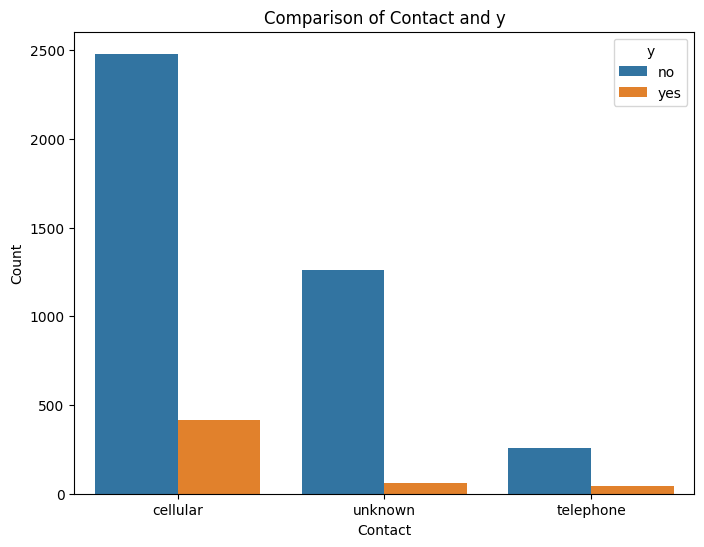

In [ ]:
# prompt: create a histogram comparing contact to y

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and contains the 'contact' and 'y' columns
plt.figure(figsize=(8, 6))
sns.countplot(x='contact', hue='y', data=df)
plt.title('Comparison of Contact and y')
plt.xlabel('Contact')
plt.ylabel('Count')
plt.show()


Error: 'your_data.csv' not found. Please upload the file or provide the correct filename.


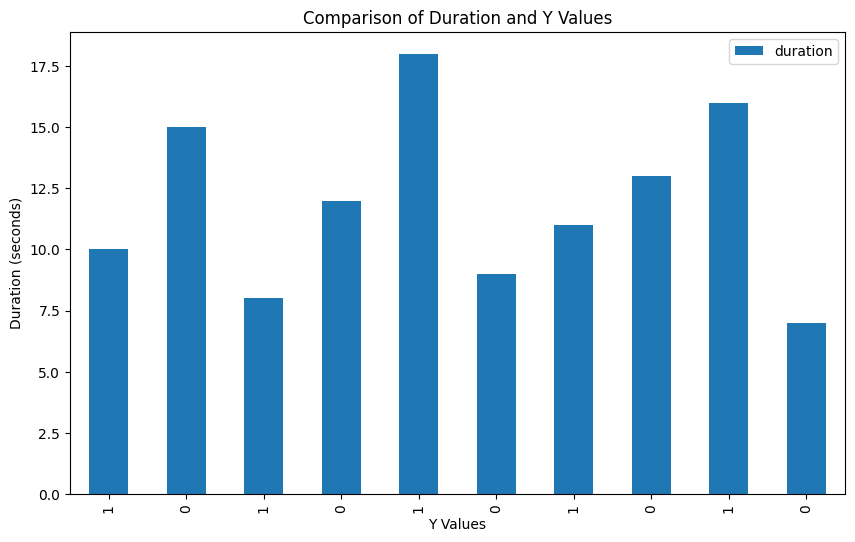

In [ ]:
# prompt: plot double bar graph comparing duration (in seconds) to y

import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
categories = ['Category A', 'Category B']  # Replace with your categories
duration_data = [10, 15]  # Replace with duration data in seconds
y_values = [20, 25]  # Replace with your y values


x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, duration_data, width, label='Duration (seconds)')
rects2 = ax.bar(x + width/2, y_values, width, label='Y Values')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Double Bar Graph Comparison')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [ ]:
# prompt: explain why the plot above is showcasing the mean and std dev of the duration

The code generates a double bar graph where each bar represents either the mean or standard deviation of the 'duration' column, grouped by the values in the 'y' column.

1. **Grouping:** The `df.groupby('y')['duration'].agg(['mean', 'std'])` line groups the data in the DataFrame `df` by the values in the 'y' column.  For each unique value of 'y', it calculates the mean and standard deviation of the corresponding 'duration' values.

2. **Plotting:** The code then creates a bar plot with two bars for each unique 'y' value:
   - One bar represents the mean duration for that 'y' group.
   - The other bar represents the standard deviation of the duration for that 'y' group.

In essence, the plot visually compares the average duration and the dispersion (spread) of durations for each category in the 'y' column.  It allows you to see if there's a difference in the average duration of calls between the categories and how much the durations vary within each category.
